In [1]:
import os 
os.chdir("..")

%load_ext autoreload
%autoreload 2
from numerics.integration.steps import *
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from numerics.utilities.misc import *
import time
from scipy.special import erf
import pickle



In [47]:
mode = "damping"
dtt = 1e-6
pars = give_def_params_discrimination(flip=0, mode = mode)
params, exp_path = check_params(pars)

total_time, dt = get_total_time_dt(params, ppp=1000, dt=dtt, total_time=4)
times = np.arange(0, total_time+ dt, dt)






def prob(t, b, kappa0, kappa1, eta0 , eta1, n0, n1, gamma0, gamma1):
    Su1 = n1 + 0.5 + (kappa1 / gamma1)
    Su0 = n0 + 0.5 + (kappa0 / gamma0)

    S1 = (np.sqrt(1 + (16.0*eta1*kappa1*Su1/gamma1)) - 1)*(gamma1/(8.0*eta1*kappa1))
    S0 = (np.sqrt(1 + (16.0*eta0*kappa0*Su0/gamma0)) - 1)*( gamma0/(8.0*eta0*kappa0))

    lam = gamma0 + (8*eta0*kappa0*S0)

    aa = (4*eta1*kappa1*(S1**2))/gamma1
    bb =(4*eta0*kappa0*S0**2)*(1+((16.0*eta1*kappa1*S1)/ (gamma1 + lam)) + (64.0*(eta1 * kappa1 * S1)**(2)/(gamma1 * (gamma1 + lam))))/ lam
    c =8 *(S0*S1*(eta0*kappa0 *eta1*kappa1)**(0.5)) * (gamma1+ (4.0*eta1*kappa1*S1) ) / ((gamma1 + lam)*gamma1)

    mu = 4*(eta1*kappa1*aa + (eta0*kappa0*bb) - 2*np.sqrt(eta1*kappa1*eta0*kappa0)*c)
    S= np.sqrt(2*mu)

    div = (np.sqrt(2*np.pi)*S*(t**(3/2)))
    return  abs(b)*np.exp(-((abs(b)-mu*t)**2)/(2*t*(S**2)))/div, mu



pars = give_def_params_discrimination(flip=0, mode = "damping")
params, exp_path = check_params(pars)
[gamma1, omega1, n1, eta1, kappa1], [gamma0, omega0, n0, eta0, kappa0] = params



indis = np.logspace(2,np.log10(len(times)-1), 100)
indis = [int(k) for k in indis]
timind = [times[ind] for ind in indis]



def get_stop_time(ell,b):
    ind_times = np.argmin(np.logical_and(ell < b, ell > -b))
    return times[ind_times]
    
    
def load_liks(itrajj, mode="damping", dtt=1e-4, total_time=4.):
    pars = give_def_params_discrimination(flip=0, mode = mode, )
    params, exp_path = check_params(pars)

    total_time, dt = get_total_time_dt(params, ppp=1000, dt=dtt, total_time = total_time)
    
    logliks =load_data_discrimination_liks(itraj=itrajj, total_time = total_time, dt=dt, exp_path = exp_path)
    l0,l1 = logliks[:,0], logliks[:,1]
    log_lik_ratio = l1 - l0  ###

    #pars = give_def_params_discrimination(flip=1, mode=mode)
    #params, exp_path = check_params(pars)
    #total_time, dt = get_total_time_dt(params, ppp=1000,dt=dtt ,total_time = total_time)
    #logliks_swap =load_data_discrimination_liks(itraj=itrajj, total_time = total_time, dt=dt, exp_path = exp_path)
    #log_lik_ratio_swap = logliks_swap[:,0] - logliks_swap[:,1]  
    
    return log_lik_ratio#, log_lik_ratio_swap

    
boundsB = [3]
mode="damping"
dtt=1e-6
total_time=4
Ntrajs=1000

total_time, dt = get_total_time_dt(params, ppp=1000, dt=dtt, total_time=4.)
times = np.arange(0, total_time+ dt, dt)

stop = {}
stop["_0"] = {i:[] for i in range(1,Ntrajs)}
stop["_1"] = {i:[] for i in range(1,Ntrajs)}

horr=[]

for itraj in tqdm(range(1, Ntrajs)):
    log_lik_ratio = load_liks(itraj, mode=mode, dtt=dtt, total_time=total_time)
    for b in boundsB:
        stop["_1"][itraj].append(get_stop_time(log_lik_ratio, b))

100%|██████████| 999/999 [14:06<00:00,  1.18it/s]


In [50]:
freq_dir = get_def_path(mode="hypothesis_testing")+"mode_{}/dt_{}_total_time_bounds{}/".format(dt,total_time,boundsB)
os.makedirs(freq_dir, exist_ok=True)
with open(freq_dir+"stop.pickle", 'wb') as handle:
    pickle.dump(stop, handle, protocol=pickle.HIGHEST_PROTOCOL)


OSError: [Errno 122] Disk quota exceeded

In [51]:
stopp1 = list(stop["_1"].values())

In [52]:
st=[]
for k in stopp1:
    if len(k) == 0:
        pass
    else:
        st.append(k)

In [53]:
stop1 = np.stack(st)

(array([ 9., 23., 32., 48., 47., 46., 60., 41., 42., 40., 50., 32., 38.,
        27., 36., 34., 32., 22., 19., 20., 19., 13., 23., 14., 16., 13.,
        16., 15.,  9., 15., 12., 13.,  7.,  9.,  6.,  6.,  9.,  5.,  4.,
         7.,  7.,  6.,  2.,  3.,  2.,  6.,  2.,  1.,  5.,  4.,  0.,  1.,
         2.,  2.,  2.,  3.,  2.,  2.,  0.,  1.,  1.,  1.,  2.,  1.,  1.,
         2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
         0.,  2.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.063712  , 0.09101979, 0.11832758, 0.14563537, 0.17294316,
        0.20025095, 0.22755874, 0.25486653, 0.28217432, 0.30948211,
        0.3367899 , 0.36409769, 0.39140548, 0.41871327, 0.44602106,
        0.47332885, 0.50063664, 0.52794443, 0.55525222, 0.58256001,
        0.6098678 , 0.63717559, 0.66448338, 0.69179117, 0.71909896,
        0.74640675, 0.77371454, 0.80102233, 0.82833012, 0.85563791,
        0.8829457 , 0.9102

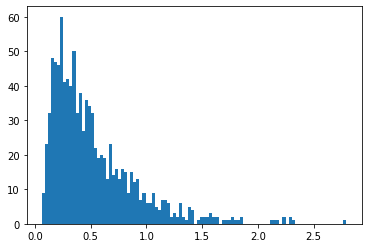

In [56]:
plt.hist(stop1[:,0], bins=100)

In [61]:
pars = give_def_params_discrimination(flip=0, mode = "damping")
params, exp_path = check_params(pars)
[gamma1, omega1, n1, eta1, kappa1], [gamma0, omega0, n0, eta0, kappa0] = params

t=1
b = boundsB[-1]
tti = np.linspace(1e-4,4,100)
probs = [ggiulio_prob(t, boundsB[0], kappa0, kappa1, eta0 , eta1, n0, n1, gamma0, gamma1)[0] for t in tti]

In [69]:
def ggiulio_prob(t, b, kappa0, kappa1, eta0 , eta1, n0, n1, gamma0, gamma1):
    Su1 = n1 + 0.5 + (kappa1 / gamma1)
    Su0 = n0 + 0.5 + (kappa0 / gamma0)

    S1 = (np.sqrt(1 + (16.0*eta1*kappa1*Su1/gamma1)) - 1)*(gamma1/(8.0*eta1*kappa1))
    S0 = (np.sqrt(1 + (16.0*eta0*kappa0*Su0/gamma0)) - 1)*( gamma0/(8.0*eta0*kappa0))

    lam = gamma0 + (8*eta0*kappa0*S0)

    aa = (4*eta1*kappa1*(S1**2))/gamma1
    bb =(4*eta0*kappa0*S0**2)*(1+((16.0*eta1*kappa1*S1)/ (gamma1 + lam)) + (64.0*(eta1 * kappa1 * S1)**(2)/(gamma1 * (gamma1 + lam))))/ lam
    c =8 *(S0*S1*(eta0*kappa0 *eta1*kappa1)**(0.5)) * (gamma1+ (4.0*eta1*kappa1*S1) ) / ((gamma1 + lam)*gamma1)

    mu = 4*(eta1*kappa1*aa + (eta0*kappa0*bb) - 2*np.sqrt(eta1*kappa1*eta0*kappa0)*c)
    S= np.sqrt(2*mu)

    div = (np.sqrt(2*np.pi)*S*(t**(3/2)))
    return  abs(b)*np.exp(-((abs(b)-mu*t)**2)/(2*t*(S**2)))/div

In [70]:
pars = give_def_params_discrimination(flip=0, mode = "damping")
params, exp_path = check_params(pars)
[gamma1, omega1, n1, eta1, kappa1], [gamma0, omega0, n0, eta0, kappa0] = params

t=1
b = boundsB[-1]
tti = np.linspace(1e-4,4,100)
probs = [ggiulio_prob(t, boundsB[0], kappa0, kappa1, eta0 , eta1, n0, n1, gamma0, gamma1) for t in tti]

<BarContainer object of 199 artists>

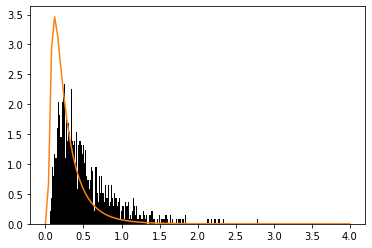

In [71]:
counts, bins, bars = plt.hist(stop1[:,0], bins=int(len(st)/5), density=True)
time_bins = (bins[1:] + bins[:-1])*0.5
db = bins[1] - bins[0]
plt.plot(np.linspace(1e-4,4,100), probs)
plt.bar(time_bins, counts, width=bins[1]-bins[0],color="black")

In [ ]:

counts, bins, bars = plt.hist(stop1[:,0], bins=20, density=True)

time_bins = (bins[1:] + bins[:-1])*0.5
db = bins[1] - bins[0]
plt.plot(np.linspace(1e-4,4,100), probs)
plt.plot(time_bins, counts, color="black")

In [145]:
probs = [prob(t, boundsB[-3], kappa0, kappa1, eta0 , eta1, n0, n1, gamma0, gamma1)[0] for t in np.linspace(1e-4,4,100)]
timms = np.linspace(1e-4,4,100)
dd = timms[1] - timms[0]

In [146]:
(boundsB[-3]/mu1 , np.sum(probs*timms*dd), np.sum(counts*time_bins)*db, np.mean(stop1[:,0]))

(0.6627157330177854, 0.662647334829573, 0.7484709083333333, 0.7474553572854292)

In [151]:
boundsB[-3]/(mu1**2) , np.sum(probs*(timms**2)*dd) - np.sum(((probs*timms)*dd)**2)#, np.sum(counts*time_bins)*db, np.std(stop1[:,0]))

(0.0627417346841858, 0.5504787796153295)

In [153]:
np.std(stop1[:,0])

0.4720284732415118

0.7478100897205587

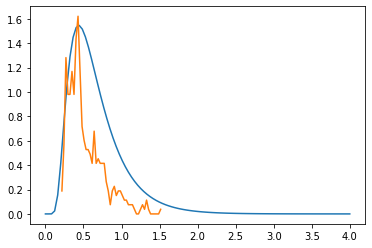

In [112]:
plt.plot(np.linspace(1e-4,4,100), probs)
plt.plot(bins[0] + 0.5*(bins[:1] + bins[:-1]), counts)

In [ ]:
stops1 = list(stop["_1"].values())
stops1 = np.stack(stops1)
stop_times1 = np.mean(stops1, axis=0)


counts, bins, bars = plt.hist(stops1[:,-1], bins=75, density=True)

np.save(freq_dir+"counts", counts)
np.save(freq_dir+"bins", bins)



In [61]:
dd = bins[1]-bins[0]

In [62]:
times_middle = (bins[1:] + bins[:-1])/2

In [63]:
np.sum(counts*times_middle)*dd

0.7011207331331333

In [65]:
probs = [ggiulio_prob(t,  boundsB[-1],kappa0, kappa1, eta0 , eta1, n0, n1, gamma0, gamma1) for t in times_middle]

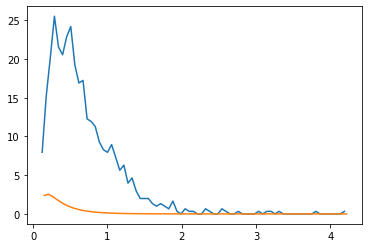

In [79]:
plt.plot(bins[:-1], counts*)
plt.plot(times_middle,probs)

48.468163686682416

In [173]:
np.sum(probs)

44.82284400327462

In [96]:



for itraj in tqdm(range(2,Ntrajs)):

    log_lik_ratio = log_lik_ratio
    log_lik_ratio_swap = log_lik_ratio_swap

    l_1 += log_lik_ratio
    l_0+= log_lik_ratio_swap
    n+=1
    for time_index in range(len(times)):
        for indb, b in enumerate(boundsB):
            deter_1 = log_lik_ratio[time_index] <= b
            deter_0 = log_lik_ratio_swap[time_index] >= b

            deter["h0/h1"][indb][ind] +=  (int(deter_1) - deter["h0/h1"][indb][ind] )/n
            deter["h1/h0"][indb][ind] += (int(deter_0) - deter["h1/h0"][indb][ind])/n

    
l_1/=Ntrajs
l_0/=Ntrajs

freq_dir = get_def_path(mode="hypothesis_testing")+"mode_{}_nolog_/N_trajs_{}/dt_{}_T_{}/bounds_{}/".format(mode,Ntrajs, dtt, total_time, len(boundsB))
os.makedirs(freq_dir, exist_ok=True)
with open(freq_dir+"stop.pickle", 'wb') as handle:
    pickle.dump(stop, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
with open(freq_dir+"deter.pickle", 'wb') as handle:
    pickle.dump(deter, handle, protocol=pickle.HIGHEST_PROTOCOL)

  1%|          | 8/998 [01:26<2:59:19, 10.87s/it]


KeyboardInterrupt: 

In [7]:
boundsB = np.arange(0,4,.2)
mode="damping"
dtt=1e-5
total_time=6.
Ntrajs=1000


freq_dir = get_def_path(mode="hypothesis_testing")+"mode_{}/N_trajs_{}/dt_{}_T_{}/bounds_{}/".format(mode,Ntrajs, dtt, total_time, len(boundsB))
with open(freq_dir+"stop.pickle", 'rb') as handle:
    stop = pickle.load( handle)
        
with open(freq_dir+"deter.pickle", 'rb') as handle:
    deter =  pickle.load( handle)

In [10]:
### compute stopping time

stopps1 = [np.array(stop["_1"][k])[~np.isnan(stop["_1"][k])] for k in stop["_1"].keys()]
stopps0 = [np.array(stop["_0"][k])[~np.isnan(stop["_0"][k])] for k in stop["_0"].keys()]

ind_max_traj1 = np.argmax([len(k) for k in stopps1])
if ind_max_traj1 == 0:
    ind_max_traj1 = len(boundsB)
ind_max_traj0 = np.argmax([len(k) for k in stopps0])
if ind_max_traj0 == 0:
    ind_max_traj0 = len(boundsB)

stop_time1 = stopps1[ind_max_traj1]
stop_time1_sq = stopps1[ind_max_traj1]**2
ns1 = 2*np.ones(len(stopps1[ind_max_traj1]))

stop_time0 = stopps0[ind_max_traj0]
stop_time0_sq = stopps0[ind_max_traj1]**2
ns0 = 2*np.ones(len(stopps0[ind_max_traj0]))

itrajs1 = list(range(1,Ntrajs))
itrajs0 = list(range(1,Ntrajs))
itrajs1.remove(ind_max_traj1+1)
itrajs0.remove(ind_max_traj0+1)

for i in tqdm(itrajs1):
    for ind,b in enumerate(boundsB):
        try:
            stop_time1[ind] += (stopps1[i][ind] - stop_time1[ind])/ns1[ind]
            stop_time1_sq[ind] += (stopps1[i][ind]**2 - stop_time1_sq[ind])/ns1[ind]

            ns1[ind] +=1
        except Exception:
            pass
        
for i in tqdm(itrajs0):
    for ind,b in enumerate(boundsB[:len(stopps0[ind_max_traj0])]):
        try:
            
            stop_time0[ind] += (stopps0[i][ind] - stop_time0[ind])/ns0[ind]
            stop_time0_sq[ind] += (stopps0[i][ind]**2 - stop_time0_sq[ind])/ns0[ind]

            ns0[ind] +=1
        except Exception:
            pass

100%|██████████| 998/998 [00:00<00:00, 12981.31it/s]


In [16]:
fulls = list(range(1,Ntrajs))
fulls.pop(88)

89

In [58]:
stop_time1[-1]

0.43520982351988585

In [63]:
np.mean(stimes)**2

(0.43638071021803143, 0.3597599693525121)

In [ ]:
gp1(t, boundsB[-1], 

In [53]:
b=boundsB[-1]
sigg = b*(1+b)/(mu1**2)

numerics = (stop_time1_sq - stop_time1[-1]**2)[-1]
print(sigg, numerics)

0.16348703437707846 0.188627643435136


In [40]:
stimes = [stop["_1"][k][len(boundsB)-1] for k in fulls]

In [49]:
np.std(stimes)**2

0.1901022335102253

0.188627643435136

0.3333786958622863

In [59]:
last = [stopps1[k][-1] for k in range(len(itrajs1))]

In [60]:
np.mean(last)

0.6596718242402558

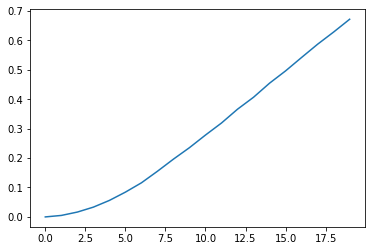

In [44]:
plt.plot(stop_time0)

In [10]:
stop0 = np.stack(stop["_0"].values())
stop1 = np.stack(stop["_1"].values())
mmeans = np.mean(stop1,axis=0)
sstd = np.std(stop1,axis=0)

In [11]:
stopping_0, std_stopping_0 = np.mean(stop0,axis=0), np.std(stop0,axis=0)
stopping_1, std_stopping_1 = np.mean(stop1,axis=0), np.std(stop1,axis=0)

In [14]:
import os 
freq_dir = get_def_path(mode="hypothesis_testing")+"{}/{}/dt{}/bounds{}".format(mode,len(stop["_1"]), dt, len(boundsB))
os.makedirs(freq_dir, exist_ok=True)

np.save(freq_dir+"times_here", timind)

np.save(freq_dir+"mean_likelihood_0", l_0)
np.save(freq_dir+"mean_likelihood_1", l_1)
np.save(freq_dir+"boundsB", boundsB)
np.save(freq_dir+"stop_time0",stopping_0)
np.save(freq_dir+"stop_time1",stopping_1)
np.save(freq_dir+"alpha_deter",np.array(deter["h0/h1"]))
np.save(freq_dir+"beta_deter",np.array(deter["h1/h0"]))

In [15]:
alpha = np.array(list(deter["h0/h1"].values()))
beta = np.array(list(deter["h1/h0"].values()))

In [64]:
avg_err_alpha = lambda o: (1-np.exp(-o))/(np.exp(o) - np.exp(-o))

def ggiulio_prob(t, b, kappa0, kappa1, eta0 , eta1, n0, n1, gamma0, gamma1):
    Su1 = n1 + 0.5 + (kappa1 / gamma1)
    Su0 = n0 + 0.5 + (kappa0 / gamma0)

    S1 = (np.sqrt(1 + (16.0*eta1*kappa1*Su1/gamma1)) - 1)*(gamma1/(8.0*eta1*kappa1))
    S0 = (np.sqrt(1 + (16.0*eta0*kappa0*Su0/gamma0)) - 1)*( gamma0/(8.0*eta0*kappa0))

    lam = gamma0 + (8*eta0*kappa0*S0)

    aa = (4*eta1*kappa1*(S1**2))/gamma1
    bb =(4*eta0*kappa0*S0**2)*(1+((16.0*eta1*kappa1*S1)/ (gamma1 + lam)) + (64.0*(eta1 * kappa1 * S1)**(2)/(gamma1 * (gamma1 + lam))))/ lam
    c =8 *(S0*S1*(eta0*kappa0 *eta1*kappa1)**(0.5)) * (gamma1+ (4.0*eta1*kappa1*S1) ) / ((gamma1 + lam)*gamma1)

    mu = 4*(eta1*kappa1*aa + (eta0*kappa0*bb) - 2*np.sqrt(eta1*kappa1*eta0*kappa0)*c)
    S= np.sqrt(2*mu)

    div = (np.sqrt(2*np.pi)*S*(t**(3/2)))
    return  abs(b)*np.exp(-((abs(b)-mu*t)**2)/(2*t*(S**2)))/div

def drift(kappa0, kappa1, eta0 , eta1, n0, n1, gamma0, gamma1):
    Su1 = n1 + 0.5 + (kappa1 / gamma1)
    Su0 = n0 + 0.5 + (kappa0 / gamma0)

    S1 = (np.sqrt(1 + (16.0*eta1*kappa1*Su1/gamma1)) - 1)*(gamma1/(8.0*eta1*kappa1))
    S0 = (np.sqrt(1 + (16.0*eta0*kappa0*Su0/gamma0)) - 1)*( gamma0/(8.0*eta0*kappa0))

    lam = gamma0 + (8*eta0*kappa0*S0)

    aa = (4*eta1*kappa1*(S1**2))/gamma1
    bb =(4*eta0*kappa0*S0**2)*(1+((16.0*eta1*kappa1*S1)/ (gamma1 + lam)) + (64.0*(eta1 * kappa1 * S1)**(2)/(gamma1 * (gamma1 + lam))))/ lam
    c =8 *(S0*S1*(eta0*kappa0 *eta1*kappa1)**(0.5)) * (gamma1+ (4.0*eta1*kappa1*S1) ) / ((gamma1 + lam)*gamma1)

    mu = 4*(eta1*kappa1*aa + (eta0*kappa0*bb) - 2*np.sqrt(eta1*kappa1*eta0*kappa0)*c)
    return mu 


pars = give_def_params_discrimination(flip=1, mode = "damping")
params, exp_path = check_params(pars)
[gamma1, omega1, n1, eta1, kappa1], [gamma0, omega0, n0, eta0, kappa0] = params

mu0 = drift(kappa0, kappa1, eta0 , eta1, n0, n1, gamma0, gamma1)

pars = give_def_params_discrimination(flip=0, mode = "damping")
params, exp_path = check_params(pars)
[gamma1, omega1, n1, eta1, kappa1], [gamma0, omega0, n0, eta0, kappa0] = params

mu1 = drift(kappa0, kappa1, eta0 , eta1, n0, n1, gamma0, gamma1)
errs = [avg_err_alpha(b) for b in boundsB]

/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


In [72]:
timms = np.linspace(1e-8,total_time, 1000)
probs = [ggiulio_prob(t, b, kappa0, kappa1, eta0 , eta1, n0, n1, gamma0, gamma1) for t in timms]

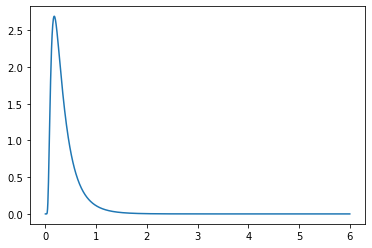

In [73]:
plt.plot(timms, probs)

In [75]:
dt = timms[1]-timms[0]

In [76]:
np.sum(probs)*dt

0.9999999935567757

In [79]:
np.sum(probs*timms)*dt

0.3597599284195039

In [82]:
stop_time1[-1]

0.6597043455366092

Loading old data


In [114]:
dirr = "/data/uab-giq/scratch/matias/quantera/trajectories/hypothesis_testing/damping_disc_unamed/set2_dt1e-5/"

In [191]:
alphaset2 = np.load(dirr+"alpha_deter.npy", allow_pickle=True)
betaset2 = np.load(dirr+"beta_deter.npy", allow_pickle=True)

boundsB2 = np.load(dirr+"boundsB.npy")
times2 = np.arange(0,4+1e-5,1e-5)

indis2 = np.logspace(2,np.log10(len(times2)-1), 50)
indis2 = [int(k) for k in indis2]
timindis2 = [times2[i] for i in indis2]

In [193]:
alphaset2 = np.stack(list(alphaset2.item().values()))
betaset2 = np.stack(list(betaset2.item().values()))

In [187]:
ind = -1
b = boundsB2[ind]
alph = np.array([.5*(1 - erf((-b + mu0*t)/(2*np.sqrt(mu1*t)))) for t in times2])

/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


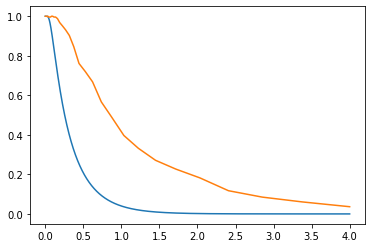

In [194]:
plt.plot(times2,alph)
plt.plot(timindis2, alphaset2[-1,:])

array([[0.37246964, 0.36842105, 0.37651822, 0.3805668 , 0.38461538,
        0.39271255, 0.39271255, 0.39676113, 0.44534413, 0.43724696,
        0.41295547, 0.4048583 , 0.44129555, 0.46558704, 0.44939271,
        0.40080972, 0.42105263, 0.40080972, 0.39271255, 0.39271255,
        0.37651822, 0.38461538, 0.3805668 , 0.36437247, 0.3562753 ,
        0.32793522, 0.33198381, 0.37246964, 0.32388664, 0.31578947,
        0.29149798, 0.27935223, 0.26720648, 0.26315789, 0.23076923,
        0.23076923, 0.18218623, 0.1417004 , 0.10526316, 0.09311741,
        0.10121457, 0.10526316, 0.09311741, 0.06882591, 0.07287449,
        0.03238866, 0.02024291, 0.01619433, 0.0242915 , 0.01619433],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        0.99595142, 0.99595142, 0.96761134, 0.94736842, 0.93117409,
        0.91497976, 0.90688259, 0.86639676, 0.81376518, 0.7854251 ,
        0.8097166 , 0.74493927, 0.67206478, 0.65182186, 0.62753036,
        0.62348178, 0.55870445, 0.55060729, 0.5

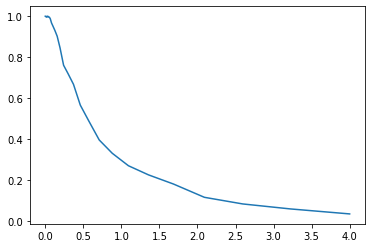

In [159]:
plt.plot(ltt, aaal1[-1,:])

In [129]:

ax = plt.subplot(133)
k=8
ax.plot(errs, stopping_1)
ax.fill_between(errs, stopping_1 - std_stopping_1, stopping_1 + std_stopping_1, alpha=0.5)
for indb, b in enumerate(boundsplot):
    ax.plot(beta[indb,:][:-k], timind[:-k], label=r'$P_1 = \beta^{b}$'+"b = {}".format(np.round(b,2)))
#ax.set_xscale("log")
ax.legend()
ax.set_xlabel("error")
ax.set_ylabel("time")

Text(0, 0.5, 'time')

Error in callback <function flush_figures at 0x2ac0be59ea60> (for post_execute):


Exception ignored in: <generator object _setattr_cm at 0x2ac0d0cd6d58>
Traceback (most recent call last):
  File "/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/matplotlib/cbook/__init__.py", line 2080, in _setattr_cm
KeyboardInterrupt: 

KeyboardInterrupt



In [201]:
beta[-1,:]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.9974587 , 0.99618806, 0.99237611, 0.98221093, 0.97712834,
       0.94027954, 0.89580686, 0.83989835, 0.75730623, 0.65819568,
       0.52858958, 0.41296061, 0.30622618, 0.19440915, 0.12833545,
       0.08259212, 0.03939009, 0.01778907, 0.00635324, 0.0025413 ,
       0.0025413 , 0.00127065, 0.00127065, 0.00127065, 0.        ])

In [202]:
alpha[-1,:]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.9974587 , 0.99618806, 0.99237611, 0.98221093, 0.97712834,
       0.94027954, 0.89580686, 0.83989835, 0.75730623, 0.65819568,
       0.52858958, 0.41296061, 0.30622618, 0.19440915, 0.12833545,
       0.08259212, 0.03939009, 0.01778907, 0.00635324, 0.0025413 ,
       0.0025413 , 0.00127065, 0.00127065, 0.00127065, 0.        ])

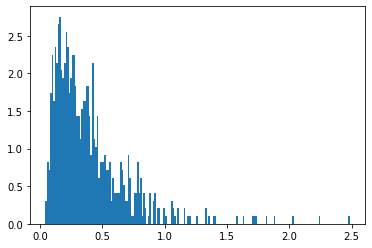

In [140]:
ii = 3
lastt = [stopps0[k][ii] for k in range(len(stopps0))]
counts, bins, bars = plt.hist(lastt, bins=int(len(lastt)/4), density= True)
[gamma1, omega1, n1, eta1, kappa1], [gamma0, omega0, n0, eta0, kappa0] = params
gp1 = [ggiulio_prob(t, boundsB[ii], kappa0, kappa1, eta0, eta1, n0, n1, gamma0,gamma1) for t in timind]

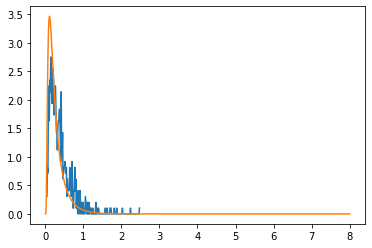

In [141]:
plt.plot(0.5*(bins[1:]+bins[:-1]), counts)
plt.plot(timind, gp1)

In [143]:
np.sum(lastt)/len(lastt)

0.38821527816845625

In [145]:
np.mean(lastt)

0.38821527816845625

0.28402102843619376

In [147]:
np.mean(counts)

0.4094501085042787

In [113]:
np.mean(counts)

0.3903657727290472

In [108]:
boundsB[4]/mu

0.37869470458159166

/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


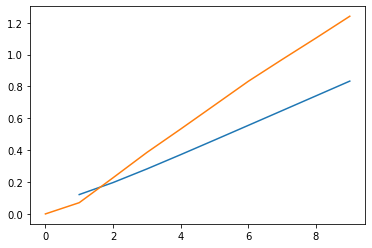

In [43]:
plt.plot(np.abs(np.log(np.array([avg_err_alpha(b) for b in boundsB])))/mu)
plt.plot(0.5*(stop_time0 + stop_time1))

In [ ]:
ax = plt.subplot(111)
ax.plot(alpha[-1,:],timind,'.')
ax.plot([avg_err_alpha(b) for b in boundsB],[times[int(np.argmin(np.abs(times - ss)))] for ss in stop_time0])
ax.plot([avg_err_alpha(b) for b in boundsB],4*np.array([times[int(np.argmin(np.abs(times - ss)))] for ss in stop_time0]))

ax.set_xscale("log")

In [26]:
times_det_alpha_is_b = np.zeros((alpha.shape[0], len(boundsB)))
for contour, bo in enumerate(range(alpha.shape[0])):
    times_det_alpha_is_b[contour] = [times[int(i)] for i in indis_alpha_is_b[contour]]

In [90]:
timind = [times[ind] for ind in indis]

In [89]:
#plt.plot(timind, [avg_err_alpha(b) for b in boundsB])
plt.plot(timind, alpha[0,:])
plt.plot(stop_time0, [avg_err_alpha(b) for b in boundsB])

/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


Error in callback <function flush_figures at 0x2afd67df4840> (for post_execute):


KeyboardInterrupt: 

In [35]:
indis_alpha_is_b[-1,:]

array([ 0., 45., 45., 45., 45., 45., 45., 46., 46., 46., 46., 46., 46.,
       47., 47., 47., 47., 47., 47., 47., 47., 48., 48., 48., 48., 48.,
       48., 48., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49.,
       49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49.,
       49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49.,
       49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49.,
       49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49.,
       49., 49., 49., 49., 49., 49., 49., 49., 49.])

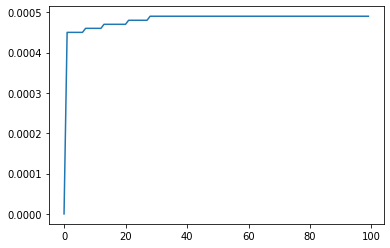

In [29]:
plt.plot(times_det_alpha_is_b[-1])
#plt.plot(stop_time0)

In [ ]:
for itraj in tqdm(range(2,3000)):
    try:
        log_lik_ratio, log_lik_ratio_swap = load_liks(itraj)
        stop["h0/h1"][itraj] = []
        stop["h1/h0"][itraj] = []
        ll += log_lik_ratio
        ll0+= log_lik_ratio_swap
        n+=1
        for ind, time_index in enumerate(indis):
            h0_deter = log_lik_ratio[time_index] <= 0
            h1_deter = log_lik_ratio_swap[time_index] <= 0
            deter["h0/h1"][ind] +=  (int(h0_deter) - deter["h0/h1"][ind] )/n
            deter["h1/h0"][ind] += (int(h0_deter) - deter["h1/h0"][ind])/n
            
            deter["h0/h1"][ind] +=  (int(h0_deter) - deter["h0/h1"][ind] )/n
            deter["h1/h0"][ind] += (int(h0_deter) - deter["h1/h0"][ind])/n
        for b in boundsB:
            stop["h0/h1"][itraj].append(get_stop_time(log_lik_ratio, b))
            stop["h1/h0"][itraj].append(get_stop_time(log_lik_ratio_swap, b))


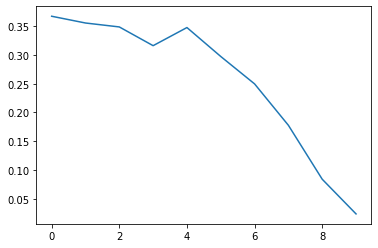

In [24]:
plt.plot(np.array(deter["h1/h0"]))

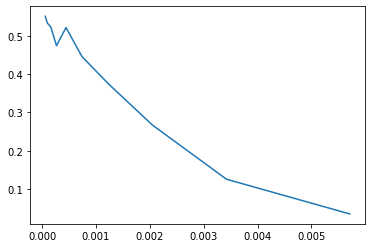

In [21]:
plt.plot([times[ind] for ind in indis], 0.5*np.array(deter["h0/h1"])+np.array(deter["h1/h0"]))

NameError: name 'ind_max_traj' is not defined

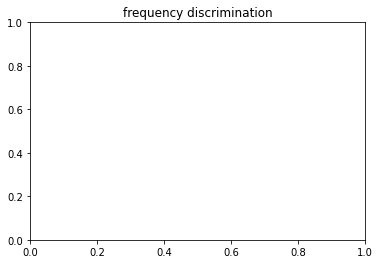

In [120]:
ax = plt.subplot(111)
plt.title("frequency discrimination")
lin=6
ax.plot(stop_time1, [avg_err_alpha(b) for b in boundsB[:len(stopps1[ind_max_traj])]], '.',label=r'$\langle \tau \rangle_{|H1}$', linewidth=lin)
ax.plot(stop_time0, [avg_err_alpha(b) for b in boundsB[:len(stopps0[ind_max_traj])]], '.',label=r'$\langle \tau \rangle_{|H0}$', linewidth=lin)
ax.plot([times[ind] for ind in indis], 0.5*np.array(deter["h0/h1"])+np.array(deter["h1/h0"]),color="black", label="deterministic")
ax.scatter([times[ind] for ind in indis], 0.5*np.array(deter["h0/h1"])+np.array(deter["h1/h0"]), color="black")

ax.set_xlabel("time")
ax.set_ylabel(r'$P_e = \frac{1}{2} (\alpha + \beta)$')
ax.legend(prop={"size":15})

In [471]:
ll *= len(stop["h0/h1"])**2
ll0 *= len(stop["h0/h1"])**2

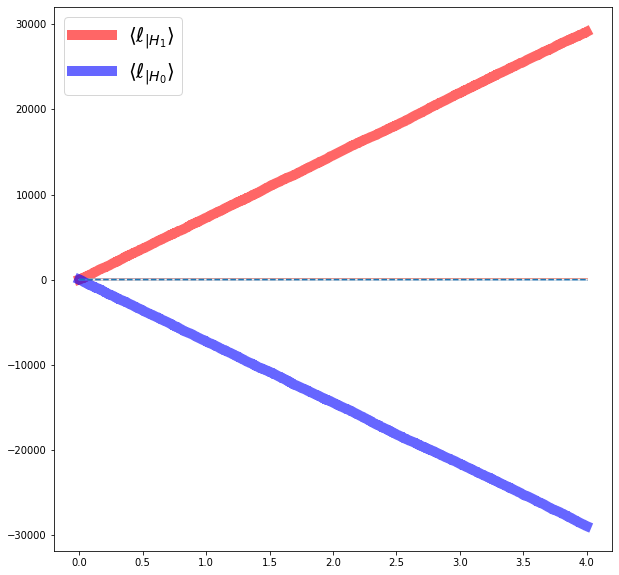

In [14]:

colors1 = plt.get_cmap("Reds")
colors0 = plt.get_cmap("Blues")

plt.figure(figsize=(10,10))
alphaMean=0.6
plt.plot(times, ll[:-1],linewidth=10, alpha=alphaMean,  color="red", label=r'$\langle \ell_{|H_1}\rangle$')
Ntraj = 10
c1 = colors1(np.linspace(0,1,Ntraj))[::-1]
c0 = colors0(np.linspace(0,1,Ntraj))[::-1]
             
for ii, itraj in enumerate(range(1,Ntraj)):
    log_lik_ratio, log_lik_ratio_swap = load_liks(itraj)
    plt.plot(times,log_lik_ratio[:-1], c=c1[ii], alpha=0.75)
    plt.plot(times, log_lik_ratio_swap[:-1],c=c0[ii], alpha=0.75)
plt.plot(times,ll0[:-1], linewidth=10, alpha=alphaMean, color="blue", label=r'$\langle \ell_{|H_0}\rangle$')
plt.plot(times, np.zeros(len(ll0)-1),"--")

plt.legend(prop={"size":20})

In [476]:
import os 
freq_dir = get_def_path(mode="continuous")+"freq_discrimination/"
os.makedirs(freq_dir, exist_ok=True)

np.save(freq_dir+"mean_likelihood_0", ll0)
np.save(freq_dir+"mean_likelihood_1", ll)
np.save(freq_dir+"boundsB", boundsB)
np.save(freq_dir+"stop_time1",stop_time1)
np.save(freq_dir+"stop_time0",stop_time0)
np.save(freq_dir+"alpha_deter",np.array(deter["h0/h1"]))
np.save(freq_dir+"beta_deter",np.array(deter["h1/h0"]))